In [1]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [2]:
df = pd.read_csv("Journey_Clusters_5.csv")

#df=df.drop(columns=['clusterID'])
df=df.drop(df.columns[0], axis=1)
df.head()

,user_id,product_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
0,586731299,5802440,2,2,22192.0,2.16,2.16,1,0,0,...,1,1,0,0,0,0,0,0,1,1
1,569852676,4938,2,1,499.0,1.43,1.43,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,448826103,5814048,3,2,7226454.0,6.27,5.95,2,0,0,...,0,0,0,0,0,0,0,1,1,3
3,448826103,5814047,2,1,1381.0,6.27,6.27,1,0,0,...,0,0,0,0,0,0,0,1,1,1
4,448826103,5787041,5,1,374.0,9.52,9.52,4,0,0,...,0,0,0,0,0,0,0,1,1,1


In [3]:
#df=df.drop(columns=['clusterID'])
df=df.drop(['user_id','product_id'], axis=1)
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
7454313,1,1,0.0,4.76,4.76,0,1,0,23,48,...,1,0,0,0,0,1,0,0,0,1
3530154,3,1,241.0,14.13,14.13,1,0,2,5,7,...,0,1,0,0,0,0,0,0,0,1
7397970,3,2,1118747.0,7.78,7.78,0,1,2,0,5,...,0,0,0,0,1,0,0,0,0,4
7964780,2,2,695753.0,7.49,7.49,0,2,0,7,19,...,0,0,0,0,0,0,0,1,0,4
78087,3,1,2155.0,16.19,16.19,1,1,0,29,1,...,0,1,0,0,0,0,0,0,1,1


In [4]:
# Next, to analyze composition of each cluster
for col in df.columns: 
    print(col) 

NumOfEventsInJourney
NumSessions
interactionTime
maxPrice
minPrice
NumCart
NumView
NumRemove
InsessionCart
InsessionView
InsessionRemove
Weekend
Fr
Mon
Sat
Sun
Thu
Tue
Wed
2019
2020
Jan
Feb
Oct
Nov
Dec
Afternoon
Dawn
EarlyMorning
Evening
Morning
Night
Noon
Purchase
clusterID


In [5]:
column_values = df["clusterID"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [6]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['clusterID'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print('Number of records in cluster', item, '=', locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

Number of records in cluster 0 = 222715
Number of records in cluster 1 = 9261877
Number of records in cluster 2 = 62673
Number of records in cluster 3 = 118332
Number of records in cluster 4 = 490603


[ 2.19 91.19  0.62  1.17  4.83]
[19.45 11.14 32.91 22.84 21.01]


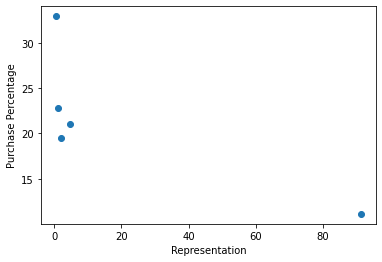

In [7]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [8]:
print(np.sum(purchase_percentage))

107.35000000000001


In [9]:
total_purchase=df.loc[df['Purchase']==1]

In [10]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

12.06919910990331


In [11]:
#subsample each cluster to 20% as df_sub and then analyz
data=[]
df_sub = pd.DataFrame(data, columns=(df.columns.values[0:34]))

for index, item in enumerate(unique_values):
    locations=df.loc[df['clusterID'] == item]
    ret_size=np.round(0.2*locations.shape[0]).astype(int)
    print(ret_size)
    rows=np.random.permutation(ret_size)
    loc_data=locations.iloc[rows,:]
    #print(loc_data.iloc[0:5,0:34])
    df_sub=df_sub.append(loc_data)
print(df_sub.shape[0])

44543
1852375
12535
23666
98121
2031240


(array([1786079.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  245161.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

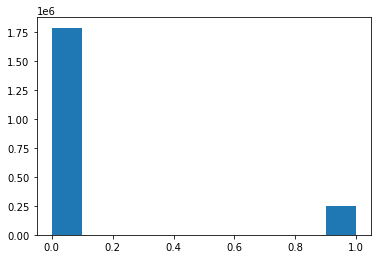

In [12]:
import matplotlib.pyplot as plt
X=np.array(df_sub[df_sub.columns[0:10]])

#Normalize X to aid compute
#X_n = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
Y=np.array(df_sub[['Purchase', 'clusterID']] )
Y=Y.astype('int')
#################################
#X=X[0:30000,:]
#Y=Y[0:30000]
#############################
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.transform(X)

plt.hist(Y[:,0])
#start with 2 clusters to 5 and show CH score increases as clusters increase

In [13]:
X1_n = (X1-X1.min(axis=0)) / (X1.max(axis=0)-X1.min(axis=0))
X1=X1_n
print(X1[0:5,:])

[[0.33969935 0.00980222 0.23165374 0.01105427 0.04717849]
 [0.29493341 0.0113553  0.22469858 0.01215024 0.03680175]
 [0.190294   0.01116261 0.22635334 0.02919781 0.0455149 ]
 [0.2367394  0.00928215 0.22643197 0.0162953  0.04095803]
 [0.31219429 0.0072581  0.22593054 0.02140244 0.03941506]]


In [14]:
# Now loop through many simulations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
import random
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

acc=0
rec=0
prec=0
f1=0
acc_c=np.zeros((5))
rec_c=np.zeros((5))
prec_c=np.zeros((5))
f1_c=np.zeros((5))
sims=5

for sim in range(sims):
    print('Simulation #=',sim)
    [X_train, X_test, y_train, y_test]=train_test_split(X1,Y,test_size=0.3, random_state=random.randint(0,1000),stratify=Y[:,1])
    #plt.hist(y_train[:,0])
    #neigh = KNeighborsClassifier(n_neighbors=3)
    #neigh.fit(X_train, y_train[:,0])
    #svm = make_pipeline(LinearSVC(C=5, tol=0.0001, max_iter=2000))
    #svm.fit(X_train, y_train[:,0])
    XGB = XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1)
    XGB.fit(X_train, y_train[:,0])
    kpred=XGB.predict(X_test)
    acc   = acc+accuracy(y_test[:,0], kpred)
    rec   = rec+recall(y_test[:,0], kpred)
    prec  = prec+precision(y_test[:,0], kpred)
    f1    = f1+f1_score(y_test[:,0], kpred)
    for index, item in enumerate(unique_values):
        idx=np.where(y_test[:,1]==item)
        ytest_c=np.squeeze(y_test[idx,0])
        kpred_c=kpred[idx]
        #rint(ytest_c.shape,kpred_c.shape)
        acc_c[item]   = acc_c[item]+accuracy(ytest_c, kpred_c)
        rec_c[item]   = rec_c[item]+recall(ytest_c, kpred_c)
        prec_c[item]  = prec_c[item]+precision(ytest_c, kpred_c)
        f1_c[item]    = f1_c[item]+f1_score(ytest_c, kpred_c)
    
print(f'Overall Accuracy = {acc/sims}, Precision = {prec/sims}, Recall = {rec/sims}, F1-score = {f1/sims}')  
print(f'Per cluster Accuracy {np.true_divide(acc_c,sims)}, \n Precision {np.true_divide(prec_c,sims)}, \n Recall {np.true_divide(rec_c,sims)}, \n F1-score {np.true_divide(f1_c,sims)}') 

Simulation #= 0


/home/sohini/anaconda3/envs/autotf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Simulation #= 1


/home/sohini/anaconda3/envs/autotf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Simulation #= 2


/home/sohini/anaconda3/envs/autotf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Simulation #= 3


/home/sohini/anaconda3/envs/autotf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Simulation #= 4


/home/sohini/anaconda3/envs/autotf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Accuracy = 0.9377887398830271, Precision = 0.8949292908866164, Recall = 0.5487765220296185, F1-score = 0.6802934492833971
Per cluster Accuracy [0.80428048 0.95152062 0.70503167 0.77684507 0.80771165], 
 Precision [0.43630325 0.90394306 0.63329042 0.53521105 0.77840519], 
 Recall [0.02242767 0.63269625 0.23070672 0.07538039 0.10720511], 
 F1-score [0.04230111 0.74433721 0.33477884 0.13200656 0.18699786]
